In [32]:
import numpy as np

In [1]:
import pandas as pd

In [2]:
from sklearn.cluster import KMeans

In [3]:
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('gurus_ML.csv')

In [5]:
data1 = data[data.notnull().all(axis=1)]

In [6]:
from sklearn import preprocessing

In [7]:
def transform_to_integer(i) :
    le = preprocessing.LabelEncoder()
    le.fit(data.iloc[:,i])
    data1.iloc[:,i] = le.transform(data1.iloc[:,i])

In [8]:
notNumbers = [1,3,4,5,6,9,10,11,12,14]

In [9]:
for i in notNumbers:
    transform_to_integer(i)

c:\program files\python37\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [10]:
data1.dtypes

Unnamed: 0            int64
Title                 int32
Year                  int64
Brand                 int32
Location              int32
State                 int32
Rental                int64
Price               float64
Mileage             float64
Transmission          int32
FuelType              int32
Engine                int32
Drivetrain            int32
OptionCount           int64
MajorOptions          int32
Accident Check      float64
OwnershipHistory    float64
dtype: object

In [11]:
data1 = data1.drop(columns=['Unnamed: 0','Title'])

In [12]:
data1.columns

Index(['Year', 'Brand', 'Location', 'State', 'Rental', 'Price', 'Mileage',
       'Transmission', 'FuelType', 'Engine', 'Drivetrain', 'OptionCount',
       'MajorOptions', 'Accident Check', 'OwnershipHistory'],
      dtype='object')

In [13]:
len(data1.columns)

15

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
stdsc = StandardScaler()

In [16]:
data1_std = stdsc.fit_transform(data1)

In [17]:
data1_std[0]

array([-1.22959063, -0.95882331, -0.65144014, -0.53801285, -0.46493069,
       -0.27909546,  1.72695728,  0.81694556,  0.27769069,  1.25625058,
       -0.2678202 , -0.60821113,  1.32598218, -0.41172141,  0.42954311])

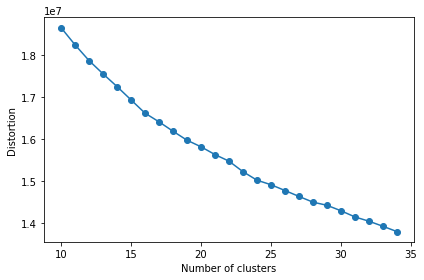

In [18]:
distortions = []
for i in range(10, 35):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0,
                n_jobs=-1)
    km.fit(data1_std)
    distortions.append(km.inertia_)
plt.plot(range(10, 35), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

In [19]:
from sklearn.cluster import DBSCAN

In [20]:
db = DBSCAN(eps=0.5, min_samples=15, metric='euclidean')

In [21]:
y_db = db.fit_predict(data1_std)

In [22]:
db.core_sample_indices_

array([    279,     281,     283, ..., 1985469, 1985473, 1985478],
      dtype=int64)

In [24]:
len(db.core_sample_indices_)

296388

In [30]:
db.labels_

array([-1, -1, -1, ...,  9, -1, -1], dtype=int64)

In [33]:
np.unique(db.labels_)
# labels 代表每一個點的標籤(每個點就是一筆資料)
# 如果 label 是 -1 ,表示 DBSCAN認為該點是 noise 點
# 而排除掉 -1 , 從 0 到 1852 , 共有 1853個不同 label , 表示分出了 1853個群

array([  -1,    0,    1, ..., 1850, 1851, 1852], dtype=int64)

In [34]:
len(db.labels_)

1985511

In [35]:
len(data1_std)

1985511

In [36]:
data1['labels'] = db.labels_

In [95]:
labels_count = data1.groupby('labels').size().reset_index(name='counts')

In [96]:
labels_sort = labels_count.sort_values(by=['counts'], ascending=False)

In [103]:
labels_sort.head(100)

,labels,counts
0,-1,1523523
2,1,67591
3,2,42447
10,9,24355
12,11,20838
...,...,...
918,917,375
80,79,373
1609,1608,368
1110,1109,364


In [104]:
labels_sort.iloc[1:100,1]

2       67591
3       42447
10      24355
12      20838
7       20555
        ...  
918       375
80        373
1609      368
1110      364
594       364
Name: counts, Length: 99, dtype: int64

In [98]:
labels_sort.iloc[:,0]

0         -1
2          1
3          2
10         9
12        11
        ... 
120      119
1664    1663
1648    1647
632      631
1179    1178
Name: labels, Length: 1854, dtype: int64

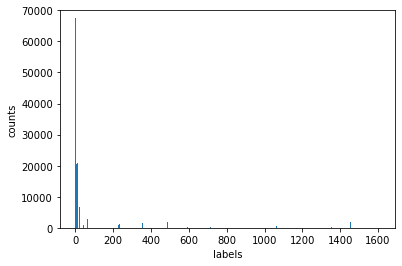

In [109]:
plt.bar(labels_sort.iloc[1:100,0], labels_sort.iloc[1:100,1])
plt.xlabel('labels')
plt.ylabel('counts')
plt.ylim(0,70000)
plt.show()

In [112]:
df_forplot = labels_sort.iloc[1:50,:]

In [113]:
df_forplot

,labels,counts
2,1,67591
3,2,42447
10,9,24355
12,11,20838
7,6,20555
1457,1456,13960
1451,1450,13372
21,20,10916
1,0,9203
6,5,9130


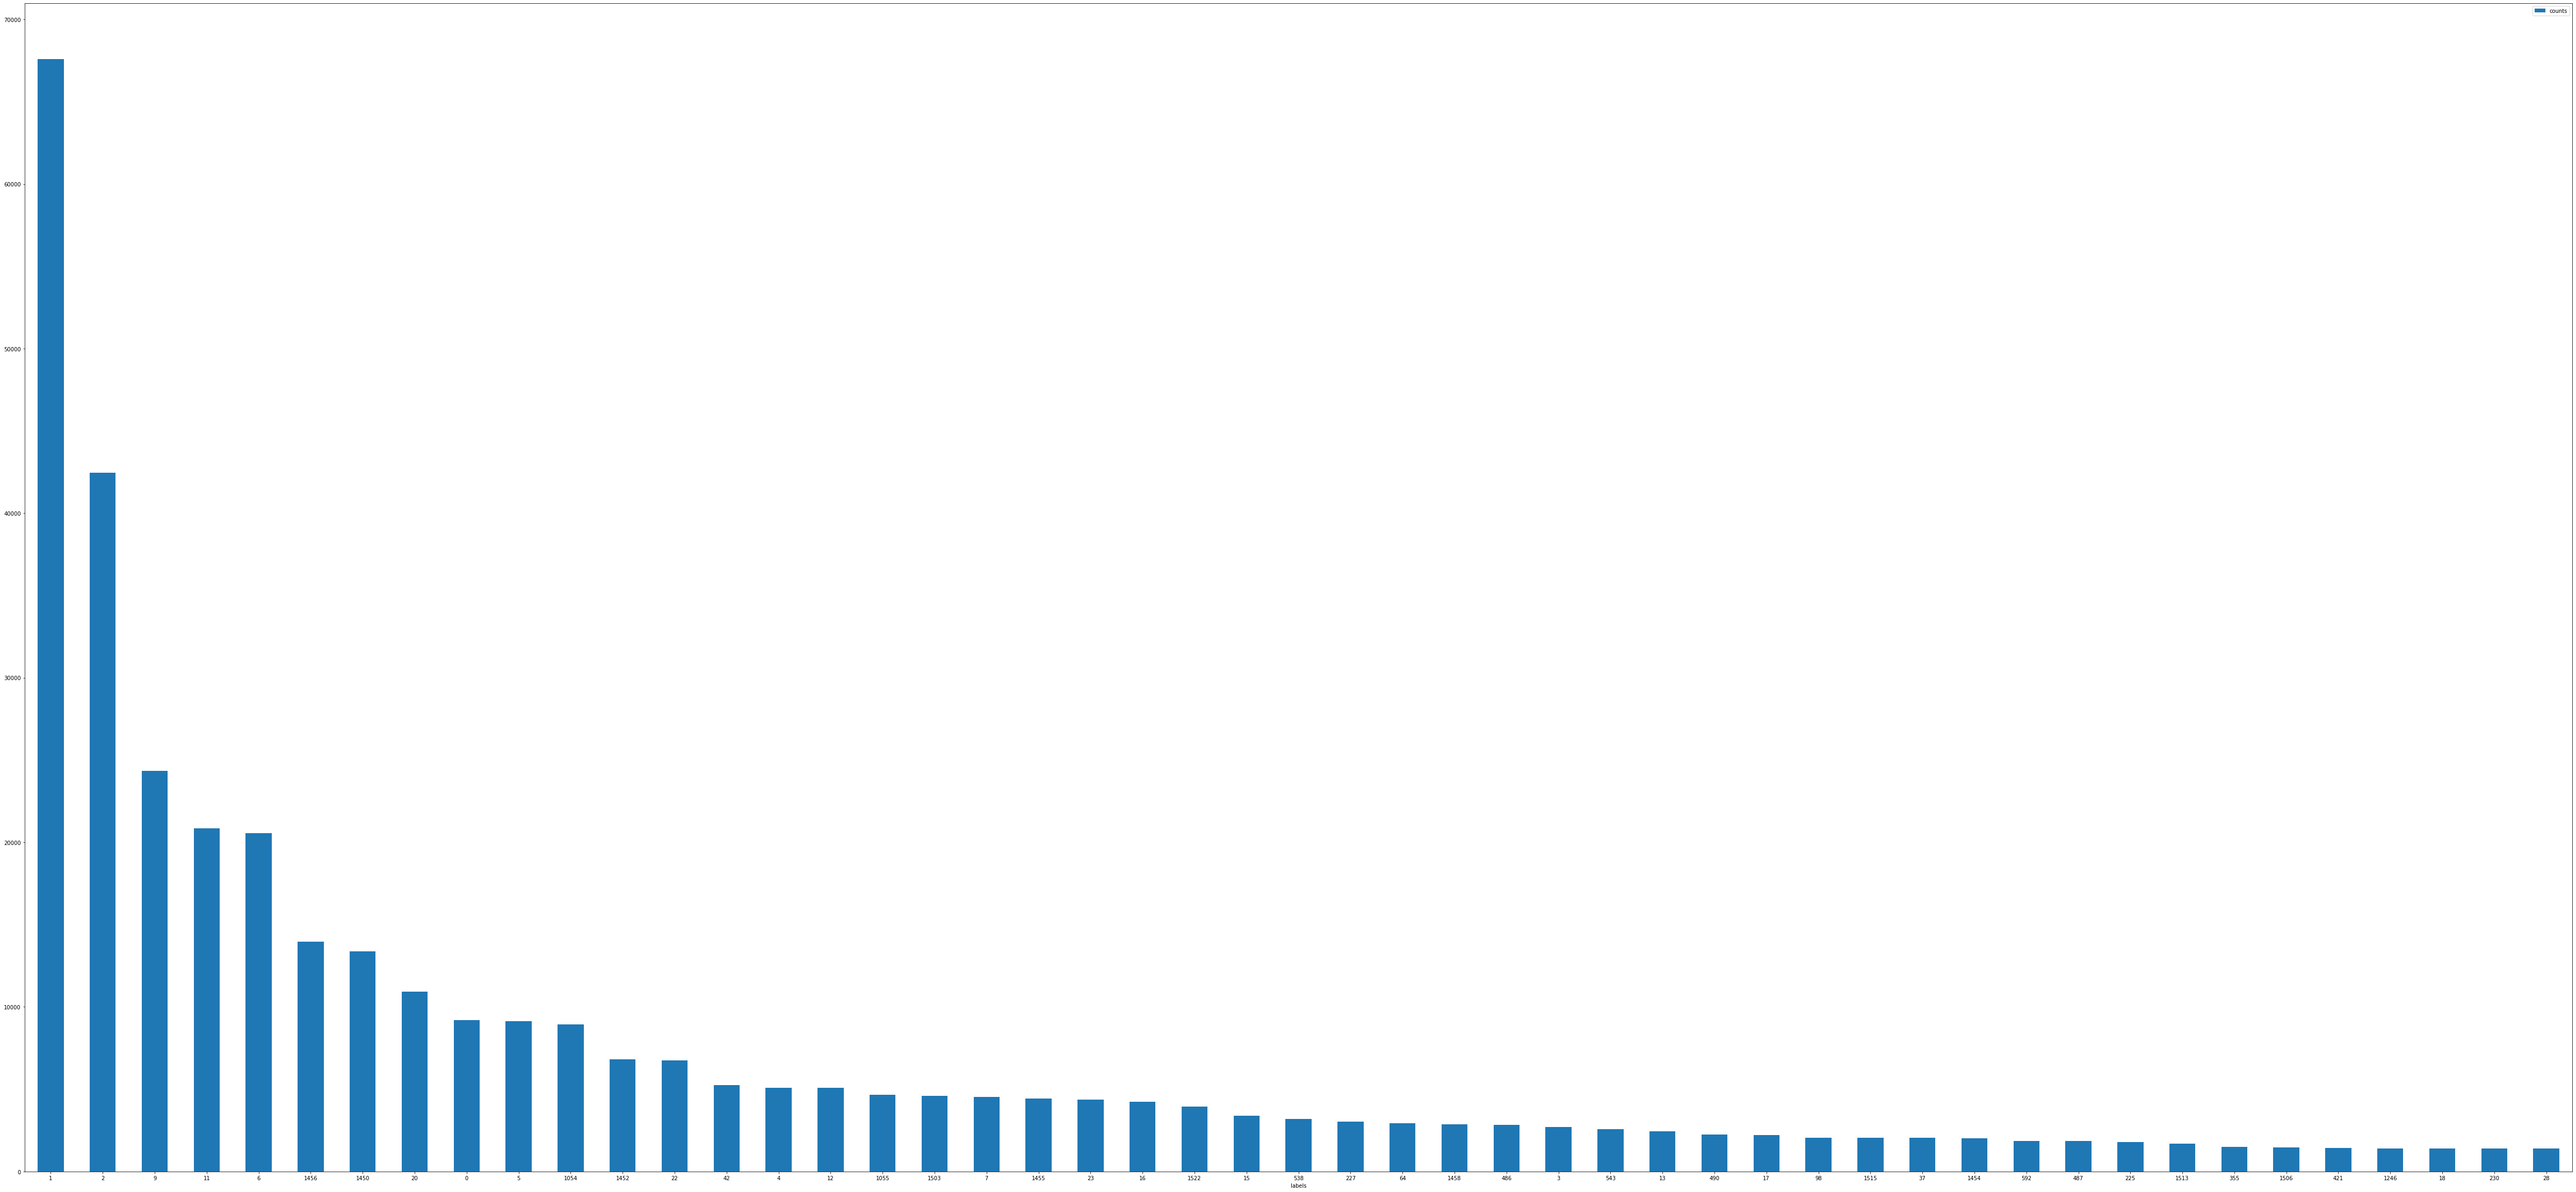

In [123]:
pic1 = df_forplot.plot.bar(x='labels', y='counts', rot=0, figsize=(85,40))

------------------------------------------------------

In [ ]:
# 再做一次 DBSCAN 放大 eps 減小 min_samples

In [133]:
db2 = DBSCAN(eps=0.7, min_samples=9, metric='euclidean', n_jobs=-1)

In [134]:
y_db2 = db2.fit_predict(data1_std)

In [135]:
labels2 = db2.labels_

In [136]:
labels2

array([-1, -1, -1, ...,  1,  3, -1], dtype=int64)

In [141]:
n_clusters_ = len(set(labels2)) - (1 if -1 in labels2 else 0)

In [142]:
n_noise_ = list(labels2).count(-1)

In [143]:
n_clusters_

3294

In [144]:
n_noise_

915598

In [ ]:
# 放大 eps 減小 min_samples 後 , 群數上升 , 同時 被分到 noise 的資料筆數也下降了